In [116]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import os
import scipy

In [122]:
groups = {"SVC": 0, "Trees": 1, "NB": 2, "Neighbors":3, "Linear":4, "DA":5, "nn":6, "Dummy":7}
labels = ["SVC", "Trees", "NB", "Neighbors", "Linear", "DA", "Network", "Dummy"]
dir = "experiment1/finalgraphs"

ttest_pvalues = np.zeros(shape=(8,8))
wilcoxon_pvalues = np.zeros(shape=(8,8))
mannwhitney_pvalues = np.zeros(shape=(8,8))
# 
# groups = {"LDA": 0, "QDA": 1, "Trees": 2}
# labels = ["LDA", "QDA", "Trees"]
# dir = "experiment2/finalgraphs"

for trained_on in groups.keys():
    baseline_dir = f"experiment1/trained{trained_on}/eval{trained_on}/aggregate/data_summary_trained{trained_on}_eval{trained_on}.txt"
    with open(baseline_dir, 'r') as baseline_file:
            lines_baseline = baseline_file.readlines()
    baseline_population = eval(lines_baseline[0])
    
    for eval_on in groups.keys(): 
        if trained_on == eval_on:
            ttest_pvalues[groups[trained_on], groups[eval_on]] = 1.0
            mannwhitney_pvalues[groups[trained_on], groups[eval_on]] = 1.0
            continue
        file_dir = f"experiment1/trained{trained_on}/eval{eval_on}/aggregate/data_summary_trained{trained_on}_eval{eval_on}.txt"
        with open(file_dir, 'r') as file:
            lines = file.readlines()
            
        # print(trained_on + eval_on + lines[1])
        
        population_2 = eval(lines[0])
        
        test_result = scipy.stats.ttest_ind(baseline_population,population_2, equal_var= False)
        
        pvalue = test_result.pvalue
        print(f"Ttest. {trained_on}, {eval_on}: {pvalue}")
        ttest_pvalues[groups[trained_on], groups[eval_on]] = pvalue
        
        mannwhitney_result = scipy.stats.mannwhitneyu(baseline_population, population_2)
        pvalue3 = mannwhitney_result.pvalue
        mannwhitney_pvalues[groups[trained_on], groups[eval_on]] = pvalue3
        
mask = np.eye(8, dtype=bool)

Ttest. SVC, Trees: 0.05903591179618762
Ttest. SVC, NB: 3.363423216948282e-27
Ttest. SVC, Neighbors: 0.3517700173080093
Ttest. SVC, Linear: 3.6506875789866743e-09
Ttest. SVC, DA: 3.8396273396356155e-29
Ttest. SVC, nn: 6.759065633309533e-11
Ttest. SVC, Dummy: 0.6233941501790834
Ttest. Trees, SVC: 9.54708206122866e-166
Ttest. Trees, NB: 4.834844600836206e-243
Ttest. Trees, Neighbors: 2.422827635246822e-72
Ttest. Trees, Linear: 8.501072568705052e-203
Ttest. Trees, DA: 2.5789112461497555e-259
Ttest. Trees, nn: 4.920149044889984e-40
Ttest. Trees, Dummy: 7.217525957090037e-192
Ttest. NB, SVC: 1.3361190552548573e-19
Ttest. NB, Trees: 4.957193029326501e-119
Ttest. NB, Neighbors: 0.9166111146657949
Ttest. NB, Linear: 8.277668147449211e-88
Ttest. NB, DA: 6.723160359031262e-108
Ttest. NB, nn: 1.9461572668510357e-88
Ttest. NB, Dummy: 4.480183788974017e-05
Ttest. Neighbors, SVC: 1.3381590500249535e-15
Ttest. Neighbors, Trees: 0.42972543163151256
Ttest. Neighbors, NB: 0.00022269048102105515
Ttest. Ne

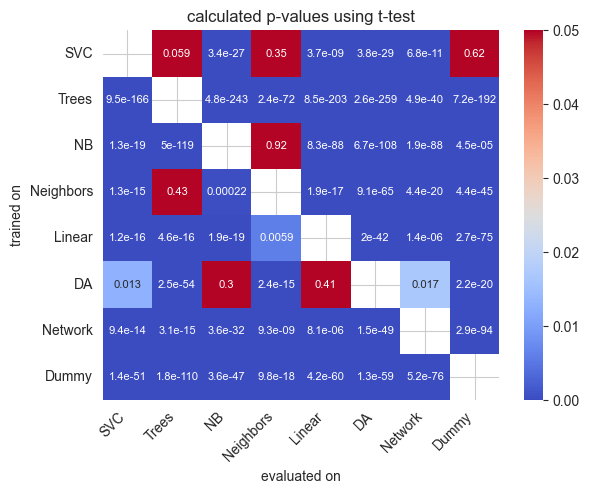

In [123]:
plot = sns.heatmap(ttest_pvalues, 
            mask=mask,
            cmap="coolwarm",
            annot=True,
            annot_kws={"size": 8},
            vmax=0.05,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "calculated p-values using t-test"
plot.set_title(name)
os.makedirs(dir, exist_ok=True)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

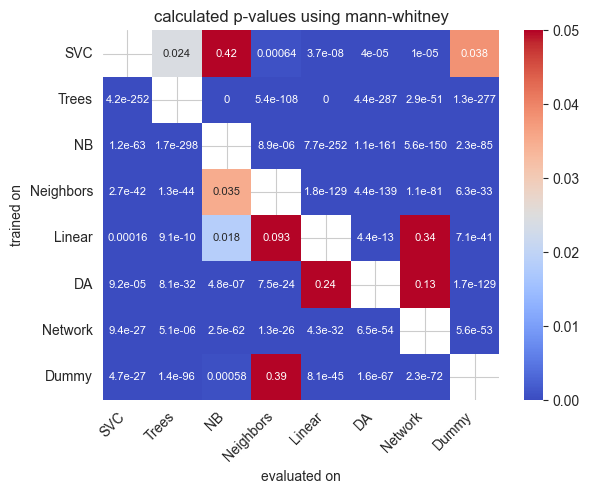

In [133]:
plot = sns.heatmap(mannwhitney_pvalues, 
            mask= mask,
            cmap="coolwarm",
            annot=True,
            annot_kws={"size": 8},
            vmax=0.05,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "calculated p-values using mann-whitney"
plot.set_title(name)
os.makedirs(dir, exist_ok=True)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()